In [0]:
# Importing the required Libraries

import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D


In [0]:
# Importing CIFAR Dataset

from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [0]:
# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, 10) # Class Labesl here is 10
y_test = keras.utils.to_categorical(y_test, 10)

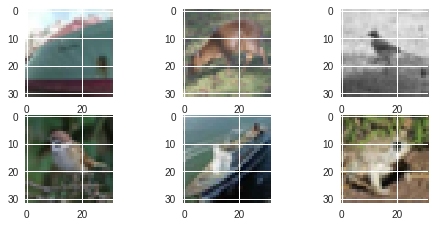

In [7]:
# Plotting Random Images

for i in range(1,7):
  plt.subplot(3,3,i)
  random_num = np.random.randint(0,len(x_train))
  plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
  

In [14]:
# Building Our Model

from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=x_train.shape[1:],padding="same",kernel_initializer="he_normal"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation="relu",input_shape=x_train.shape[1:],padding="same",kernel_initializer="he_normal"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))


print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss="categorical_crossentropy",optimizer = opt,metrics=["accuracy"])

In [16]:
my_model = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 552us/step - loss: 1.5099 - acc: 0.4518 - val_loss: 1.2143 - val_acc: 0.5588
Epoch 2/10
50000/50000 [==============================] - 25s 506us/step - loss: 1.1143 - acc: 0.6044 - val_loss: 0.9125 - val_acc: 0.6817
Epoch 3/10
50000/50000 [==============================] - 25s 506us/step - loss: 0.9608 - acc: 0.6648 - val_loss: 0.8146 - val_acc: 0.7159
Epoch 4/10
50000/50000 [==============================] - 25s 504us/step - loss: 0.8614 - acc: 0.6958 - val_loss: 0.7646 - val_acc: 0.7327
Epoch 5/10
50000/50000 [==============================] - 25s 508us/step - loss: 0.7960 - acc: 0.7207 - val_loss: 0.7351 - val_acc: 0.7392
Epoch 6/10
50000/50000 [==============================] - 25s 500us/step - loss: 0.7458 - acc: 0.7396 - val_loss: 0.7260 - val_acc: 0.7470
Epoch 7/10
50000/50000 [==============================] - 25s 497us/step - loss: 0.7034 - acc: 0.7520 - val_loss: 0.

In [17]:
score = model.evaluate(x_test,y_test,verbose=1)
score

10000/10000 [==============================] - 1s 147us/step


[0.7109880188941956, 0.7631]

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7109880188941956
Test accuracy: 0.7631


**Plotting our Accuracy and Loss Charts**

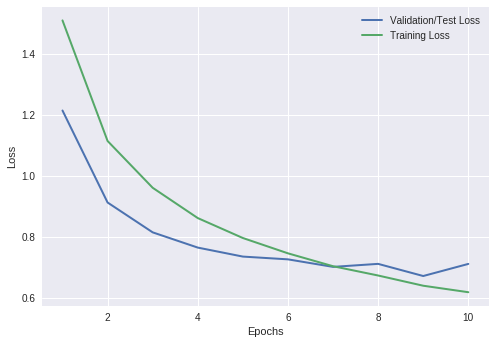

In [20]:
# Plotting our Loss Charts

history_dict = my_model.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

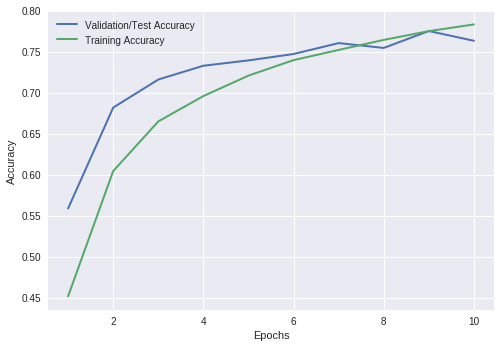

In [21]:
# Plotting our accuracy chart

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [0]:
# Saving Our Model

model.save("cifar_simple_cnn_2.h5")